## Observations and Insights 

In [99]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, on ="Mouse ID")

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_data_complete["Mouse ID"].nunique()


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice



array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] == "g989", :]
print(duplicate_data.shape)
duplicate_data




(13, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] != "g989", :]


In [6]:
# Checking the number of mice in the clean DataFrame.
print(cleaned_df.shape)
print(mouse_data_complete.shape)

(1880, 8)
(1893, 8)


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

mean = cleaned_df.groupby("Drug Regimen")["Tumour Volume (mm3)"].mean()
median =  cleaned_df.groupby("Drug Regimen")["Tumour Volume (mm3)"].median()
variance = cleaned_df.groupby("Drug Regimen")["Tumour Volume (mm3)"].var()
std_dev = cleaned_df.groupby("Drug Regimen")["Tumour Volume (mm3)"].std()
SEM = cleaned_df.groupby("Drug Regimen")["Tumour Volume (mm3)"].sem()

summary_stats_df = pd.DataFrame({"Mean Tumor Volume (mm3)": mean, 
                                 "Median Tumor Volume (mm3)": median, 
                                 "Tumor Volume (mm3) Variance ": variance, 
                                 "Tumor Volume (mm3) Standard Deviation": std_dev, 
                                "Tumor Volume (mm3) Standard Error": SEM})
summary_stats_df


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_aggregated = cleaned_df.groupby("Drug Regimen")["Tumour Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_statistics_aggregated

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = cleaned_df.groupby("Drug Regimen")["Timepoint"].count()




Text(0, 0.5, 'Timepoint Count')

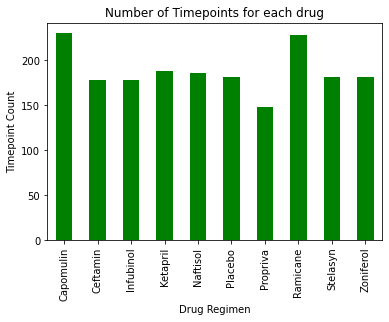

In [10]:
pandas_bar_plot = timepoints.plot.bar(color="green")
plt.title("Number of Timepoints for each drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint Count")



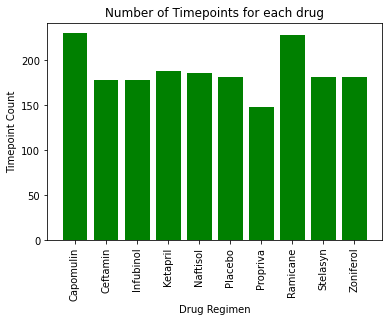

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_values = timepoints.index.values
y_values = timepoints.values
plt.bar(x_values, y_values, color ='green', align = "center")
plt.xticks(rotation=90)
plt.title("Number of Timepoints for each drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint Count")
plt.show()


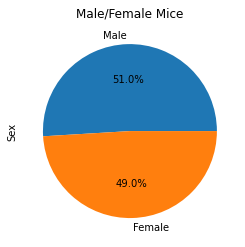

In [138]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = cleaned_df["Sex"].value_counts()
gender.plot.pie(autopct= "%1.1f%%", title="Male/Female Mice")
plt.show()



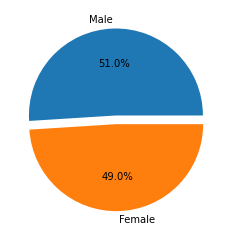

In [139]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [51, 49]
explode = (0,0.1)

plt.pie(sizes, explode = explode, labels = labels, autopct= "%1.1f%%",)
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumour volume at the last timepoint


In [15]:
#Capomulin
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin", :]
capomulin_max = capomulin_df.groupby("Mouse ID")["Timepoint"].max()
capomulin_merge = pd.merge(capomulin_max, cleaned_df, on=("Mouse ID", "Timepoint"), how="left")
capomulin_tumours = capomulin_merge["Tumour Volume (mm3)"]
capomulin_tumours

0     38.982878
1     38.939633
2     30.485985
3     37.074024
4     40.159220
5     47.685963
6     37.311846
7     38.125164
8     38.753265
9     41.483008
10    38.846876
11    28.430964
12    33.329098
13    46.539206
14    32.377357
15    41.581521
16    23.343598
17    40.728578
18    34.455298
19    31.023923
20    40.658124
21    39.952347
22    36.041047
23    28.484033
24    31.896238
Name: Tumour Volume (mm3), dtype: float64

In [16]:
#Ramicane
ramicane_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", :]
ramicane_max = ramicane_df.groupby("Mouse ID")["Timepoint"].max()
ramicane_merge = pd.merge(ramicane_max, cleaned_df, on=("Mouse ID", "Timepoint"), how="left")
ramicane_tumours = ramicane_merge["Tumour Volume (mm3)"]
ramicane_tumours

0     38.407618
1     43.047543
2     38.810366
3     32.978522
4     38.342008
5     33.397653
6     37.311236
7     40.659006
8     29.128472
9     33.562402
10    36.374510
11    31.560470
12    36.134852
13    22.050126
14    30.564625
15    31.095335
16    45.220869
17    36.561652
18    37.225650
19    43.419381
20    30.276232
21    40.667713
22    43.166373
23    44.183451
24    30.638696
Name: Tumour Volume (mm3), dtype: float64

In [17]:
#Infubinol
infubinol_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", :]
infubinol_max = infubinol_df.groupby("Mouse ID")["Timepoint"].max()
infubinol_merge = pd.merge(infubinol_max, cleaned_df, on=("Mouse ID", "Timepoint"), how="left")
infubinol_tumours = infubinol_merge["Tumour Volume (mm3)"]
infubinol_tumours

0     67.973419
1     65.525743
2     57.031862
3     66.083066
4     72.226731
5     36.321346
6     60.969711
7     62.435404
8     60.918767
9     67.289621
10    66.196912
11    62.117279
12    47.010364
13    60.165180
14    55.629428
15    45.699331
16    54.656549
17    55.650681
18    46.250112
19    54.048608
20    51.542431
21    50.005138
22    58.268442
23    67.685569
24    62.754451
Name: Tumour Volume (mm3), dtype: float64

In [18]:
#Ceftamin
ceftamin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin", :]
ceftamin_max = ceftamin_df.groupby("Mouse ID")["Timepoint"].max()
ceftamin_merge = pd.merge(ceftamin_max, cleaned_df, on=("Mouse ID", "Timepoint"), how="left")
ceftamin_tumours = ceftamin_merge["Tumour Volume (mm3)"]
ceftamin_tumours

0     62.999356
1     45.000000
2     56.057749
3     55.742829
4     48.722078
5     47.784682
6     61.849023
7     68.923185
8     67.748662
9     57.918381
10    46.784535
11    59.851956
12    64.299830
13    59.741901
14    61.433892
15    64.192341
16    45.000000
17    52.925348
18    45.000000
19    67.527482
20    45.000000
21    64.634949
22    61.386660
23    68.594745
24    64.729837
Name: Tumour Volume (mm3), dtype: float64

In [19]:
#merging all final tumour data into same data frame
merged = pd.merge(ceftamin_merge, infubinol_merge, how="outer")
merged1 = pd.merge(merged, ramicane_merge, how="outer")
final_volume_df = pd.merge(merged1, capomulin_merge, how="outer")
final_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
...,...,...,...,...,...,...,...,...
95,v923,45,Capomulin,Female,19,21,40.658124,2
96,w150,10,Capomulin,Male,23,23,39.952347,0
97,w914,45,Capomulin,Male,24,21,36.041047,2
98,x401,45,Capomulin,Female,16,15,28.484033,0


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumour vol data (for plotting)
tumour_vol_data = []



    
    # Locate the rows which contain mice on each drug and get the tumour volumes
for drug in drug_list:
    drug_regimen = final_volume_df.loc[final_volume_df["Drug Regimen"] == drug]
    tumour_volumes = drug_regimen["Tumour Volume (mm3)"]
    tumour_vol_data.append(tumour_volumes)
     
# Calculate the IQR and quantitatively determine if there are any potential outliers.     
capomulin_quartile = tumour_vol_data[0].quantile([.25,.5,.75])
capomulin_lower = capomulin_quartile[.25]
capomulin_upper = capomulin_quartile[.75]
capomulin_iqr = capomulin_upper - capomulin_lower

ramicane_quartile = tumour_vol_data[1].quantile([.25,.5,.75])
ramicane_lower = ramicane_quartile[.25]
ramicane_upper = ramicane_quartile[.75]
ramicane_iqr = ramicane_upper - ramicane_lower

infubinol_quartile = tumour_vol_data[2].quantile([.25,.5,.75])
infubinol_lower = infubinol_quartile[.25]
infubinol_upper = infubinol_quartile[.75]
infubinol_iqr = infubinol_upper - infubinol_lower

ceftamin_quartile = tumour_vol_data[3].quantile([.25,.5,.75])
ceftamin_lower = ceftamin_quartile[.25]
ceftamin_upper = ceftamin_quartile[.75]
ceftamin_iqr = ceftamin_upper - ceftamin_lower

print(f'Interquartile range of Capomulin is {capomulin_iqr}')
print(f'Interquartile range of Ramicane is {ramicane_iqr}')
print(f'Interquartile range of Infubinol is {infubinol_iqr}')
print(f'Interquartile range of Ceftamin is {ceftamin_iqr}')
    # Determine outliers using upper and lower bounds
capomulin_lower_bound = capomulin_lower - (1.5 * capomulin_iqr)   
capomulin_upper_bound = capomulin_upper + (1.5 * capomulin_iqr)

ramicane_lower_bound = ramicane_lower - (1.5 * ramicane_iqr)   
ramicane_upper_bound = ramicane_upper + (1.5 * ramicane_iqr)

infubinol_lower_bound = infubinol_lower - (1.5 * infubinol_iqr)   
infubinol_upper_bound = infubinol_upper + (1.5 * infubinol_iqr)

ceftamin_lower_bound = ceftamin_lower - (1.5 * ceftamin_iqr)   
ceftamin_upper_bound = ceftamin_upper + (1.5 * ceftamin_iqr)

print(f'For Capomulin, values below {capomulin_lower_bound} or above {capomulin_upper_bound} could be outliers')
print(f'For Ramicane, values below {ramicane_lower_bound} or above {ramicane_upper_bound} could be outliers')
print(f'For Infubinol, values below {infubinol_lower_bound} or above {infubinol_upper_bound} could be outliers')
print(f'For Ceftamin, values below {ceftamin_lower_bound} or above {ceftamin_upper_bound} could be outliers')



Interquartile range of Capomulin is 7.781863460000004
Interquartile range of Ramicane is 9.098536719999998
Interquartile range of Infubinol is 11.477135160000003
Interquartile range of Ceftamin is 15.577752179999997
For Capomulin, values below 20.70456164999999 or above 51.83201549 could be outliers
For Ramicane, values below 17.912664470000003 or above 54.30681135 could be outliers
For Infubinol, values below 36.83290494999999 or above 82.74144559000001 could be outliers
For Ceftamin, values below 25.355449580000002 or above 87.66645829999999 could be outliers


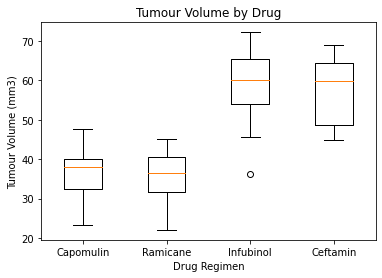

In [21]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
ax1 =plt.subplot()
ax1.boxplot(tumour_vol_data, labels = drug_list)
ax1.set_xlabel("Drug Regimen")
ax1.set_title("Tumour Volume by Drug")
ax1.set_ylabel("Tumour Volume (mm3)")
plt.show()

## Line and Scatter Plots

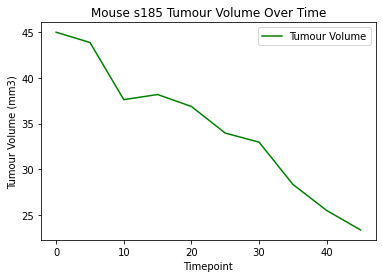

In [26]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
mouse_s185 = cleaned_df.loc[cleaned_df["Mouse ID"] == "s185"]
tumour_volume_y = mouse_s185["Tumour Volume (mm3)"]
timepoint_x = mouse_s185["Timepoint"]
plt.plot(timepoint_x, tumour_volume_y, color = "green", label = "Tumour Volume")
plt.legend(loc="upper right")
plt.xlabel("Timepoint")
plt.ylabel("Tumour Volume (mm3)")
plt.title("Mouse s185 Tumour Volume Over Time")
plt.show()

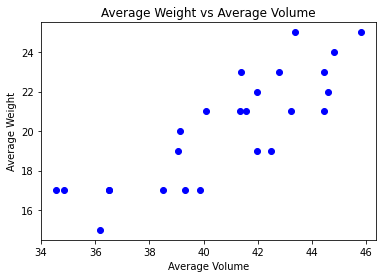

In [122]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
capomulin_regimen = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
average_volume = capomulin_regimen.groupby("Mouse ID")["Tumour Volume (mm3)"].mean()
average_weight = capomulin_regimen.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(average_volume, average_weight, color="blue")
plt.title("Average Weight vs Average Volume")
plt.xlabel("Average Volume")
plt.ylabel("Average Weight")
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717


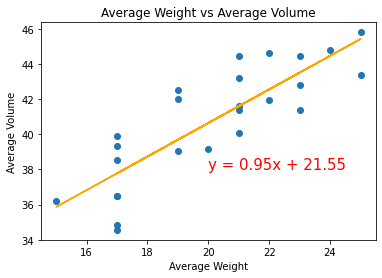

In [127]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
correlation = st.pearsonr(average_weight, average_volume)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(average_weight, average_volume)
regress_values = average_weight * slope + intercept
line_eq = (f'y = {round(slope,2)}x + {round(intercept,2)}')
plt.scatter(average_weight, average_volume)
plt.plot(average_weight, regress_values,"orange")
plt.annotate(line_eq,(20,38),color="red",fontsize=15)
plt.xlabel("Average Weight")
plt.ylabel("Average Volume")
plt.title("Average Weight vs Average Volume")
print(f"The r-squared is: {rvalue**2}")
plt.show()


In [ ]:
# For mouse weight and average tumour volume the r-squared value is 0.7, this means approximately 70% of the movement in volume can be explained by the movement in weight. This indicates a decently strong positive correlation.
# For mouse s185, We can see over time the tumour volume steadily decreases. This could indicate success of the drug regimen for this mouse at reducing tumour size volume.
# Looking at the boxplot we can see there is 1 outlier for the Infubinol drug regimen.
# There is a roughly 50/50 split in female vs male mice.